In [1]:
import torch
import numpy as np
import os
import sys
import matplotlib.pyplot as plt

### Load Predictions

In [2]:
datapath_py ="resources/saved/py_predicted_cycle.txt"
datapath_cpp ="resources/saved/cpp_predicted_cycle.txt"

def read_predictions(datapath):
    with open(datapath) as file_content:
        file_content = [i for i in file_content.readlines()]
    
    out=[]
    for i in file_content:
        if i == '\n':
            print("Skip Empty line")
            continue
        out_pair = list(map(float, i.split()))
        out.append(out_pair)
    
    return np.array(out)

In [3]:
py_pred = read_predictions(datapath_py)
cpp_pred = read_predictions(datapath_cpp)

Skip Empty line
Skip Empty line


### Print Predictions

In [4]:
print("Python fwd pass: ", py_pred)
print("C++ fwd pass: ", cpp_pred)

Python fwd pass:  [[0.21623683 0.78376317]
 [0.21018669 0.78981334]
 [0.68355036 0.31644967]
 [0.14434026 0.85565972]
 [0.19162259 0.80837739]
 [0.65566438 0.34433565]
 [0.06425371 0.93574631]
 [0.63653803 0.363462  ]
 [0.0741361  0.92586386]
 [0.76896942 0.2310306 ]
 [0.28831816 0.71168184]
 [0.88230246 0.1176975 ]
 [0.52083325 0.47916675]]
C++ fwd pass:  [[0.216237 0.783763]
 [0.210187 0.789813]
 [0.68355  0.31645 ]
 [0.14434  0.85566 ]
 [0.191623 0.808377]
 [0.655664 0.344336]
 [0.064254 0.935746]
 [0.636538 0.363462]
 [0.074136 0.925864]
 [0.768969 0.231031]
 [0.288318 0.711682]
 [0.882303 0.117697]
 [0.520833 0.479167]]


### Scatter Plots

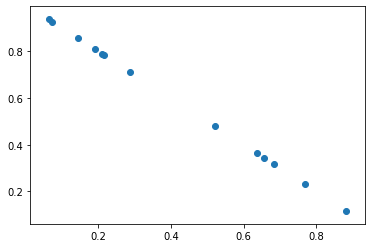

In [5]:
plt.scatter(py_pred[:,0], py_pred[:,1])

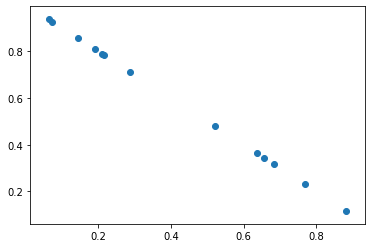

In [6]:
plt.scatter(cpp_pred[:,0], cpp_pred[:,1])

### Error

In [7]:
err_arr = py_pred-cpp_pred

In [8]:
err_arr

array([[-1.70242310e-07,  1.70242310e-07],
       [-3.09907913e-07,  3.39710236e-07],
       [ 3.57818604e-07, -3.28016281e-07],
       [ 2.61816978e-07, -2.76718140e-07],
       [-4.14941788e-07,  3.85139465e-07],
       [ 3.84365082e-07, -3.54562759e-07],
       [-2.89789677e-07,  3.12141418e-07],
       [ 2.87170410e-08,  1.08528136e-09],
       [ 1.00709438e-07, -1.37962341e-07],
       [ 4.16618347e-07, -4.01717186e-07],
       [ 1.57196045e-07, -1.57196045e-07],
       [-5.36945343e-07,  4.99692440e-07],
       [ 2.53860474e-07, -2.53860474e-07]])

### Norm

In [9]:
py_pred_norm = np.linalg.norm(py_pred)
cpp_pred_norm = np.linalg.norm(cpp_pred)

print("Norms for python predictions and c++ predictions:", py_pred_norm, cpp_pred_norm)

Norms for python predictions and c++ predictions: 2.948778180317615 2.9487779999525228


### np.allclose()

In [10]:
# True if two arrays are element-wise equal within a tolerance.
np.allclose(py_pred, cpp_pred) # default rtol=1e-05 

True